# Домашнее задание 2: Pandas и простые визуализации

В данном домашнем задании очень важно **внимательно** читать формулировку задания и все комментарии.

1. С помощью Pandas вызовом одной фукнкци считайте набор данных из файла  'supermarket_sales.csv' , который лежит в папке `data`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv('supermarket_sales.csv') # ваш код тут

2. Покажите первые 5 и последние 5 записей в наборе данных.

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


3. Выведите названия колонок в наборе данных вместе с их типами данных.

In [5]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

4. Сколько колонок имеют текстовый тип данных? Сколько колонок содержат числа (тип данных float/int)? Ответ нужно вывести с помощью использования функций Pandas.

In [6]:
df.dtypes.value_counts()

object     9
float64    7
int64      1
dtype: int64

5. Сколько всего покупок сделали мужчины, а сколько женщины? Ответ должен быть сгенерирован одной строчкой кода и содержаться в одной pd.Series. Вывести отдельно количество покупок мужчин и количество покупок женщин будет в данном задании ошибкой.
Подсказка: можно выполнить задание используя метод value_counts(), а можно - используя метод groupby()

In [7]:
df.groupby('Gender').count()['Invoice ID']

Gender
Female    501
Male      499
Name: Invoice ID, dtype: int64

6. Какие есть продуктовые линии в наборе данных? Вывести уникальные названия.

In [8]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

7. Какая средняя цена товара в каждой продуктовой линии? Сгенерировать ответ одной строчкой кода.  
Цена товара содержится в колонке `'Unit price'`

In [9]:
df.groupby('Product line').mean()['Unit price']

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64

8. Преобразуйте колонку Date в формат datetime.

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

9. C помощью команды plot() выведите линейный график сумы всех покупок за каждый день, что есть в наборе данных. Задайте линии зелёный цвет.   
В данном задании надо просуммировать значения колонки Total по дням и вывести на графике. Не забудьте подписать оси и дать графику название (`title`). К примеру, по оси ОУ у нас будет название 'Total amount', а заголовок графика 'Daily total samount of sales'. Но можете придумать и свои названия :)  
Задание можно (но не обязательно) выполнить одной строкой кода пользуясь только методами pandas.

<AxesSubplot: title={'center': 'Daily Sales'}, xlabel='Days', ylabel='Total amount'>

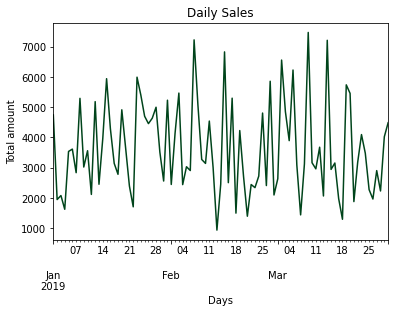

In [11]:
(df.groupby(['Date'])
    .sum()['Total']
    .plot(
        kind='line', 
        title='Daily Sales', 
        colormap='Greens_r', 
        xlabel='Days', 
        ylabel='Total amount'
        )
)

10. А теперь вывите на линейном графике подневно сколько продаж было сделано в каждой ветке (`Branch`). Задайте размер фигуры (10,6).
Должны быть три линии (по одной на ветвь) на одном графике.
Количеством продаж счистаем количество `Invoice ID` в этот день.

Задание можно (но не обязательно) выполнить одной строкой кода пользуясь только методами pandas.  
Один из способов выполнить это задание - сначала преобразовать данные в формат, где индексом выступает дата, колонками - названия ветвей, а значения - это количество продаж.   
Эту таблицу потом легко отрисовать функцией `plot()`.  
Для описанной трансформации данных используйте `pivot_table()`.

<AxesSubplot: xlabel='Date'>

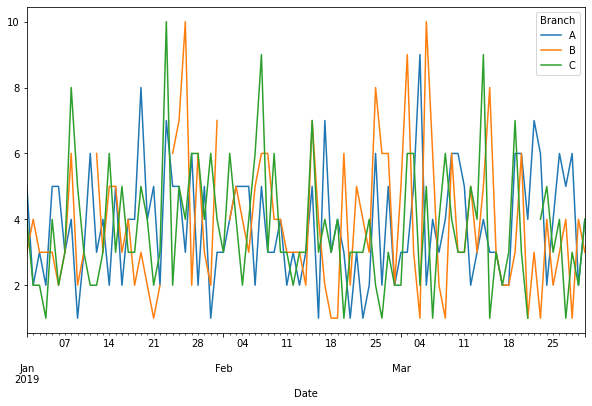

In [12]:
pd.pivot_table(
    df, 
    values='Invoice ID', 
    aggfunc='count', 
    columns='Branch', 
    index='Date').plot(figsize=(10, 6))

Кажется, на этом графике сложно что-то понять. 
Выведите динамику по каждой из ветвей на отдельный график.  
Максимально просто это сделать передав значение параметра `subplots=True` в функцию `plot()`.  
Задайте размер фигуры (10,10).

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>], dtype=object)

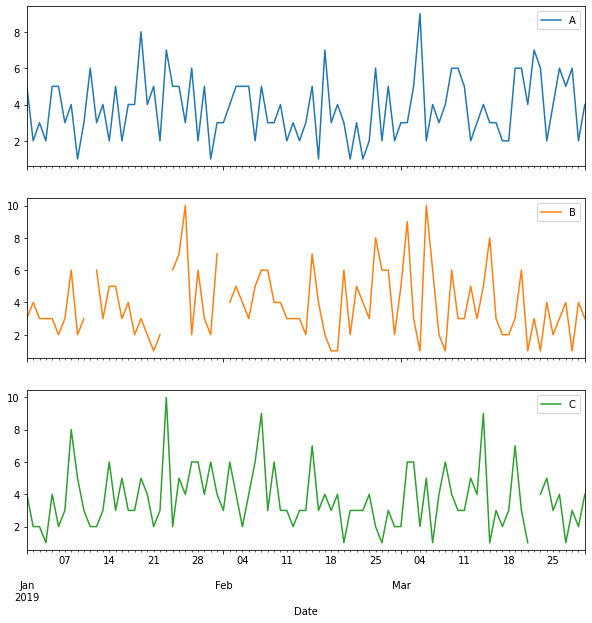

In [13]:
pd.pivot_table(
    df, 
    values='Invoice ID', 
    aggfunc='count', 
    columns='Branch', 
    index='Date').plot(figsize=(10, 10), subplots=True)

Удобнее было бы наверное смотреть на эти графики, если бы они были сглажены.  
Один из методов сглаживания - скользящее среднее (Moving Average - MA). Суть его в том, что в каждой точке значение равно среднему N предыдущих.  
Для того, чтоб посчитать скользящее среднее мы можем использовать функцию [pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html).     

Используя параметры window=10 и min_periods=1 выведите сглаженные подневные графики количества продаж по ветвям. 

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>], dtype=object)

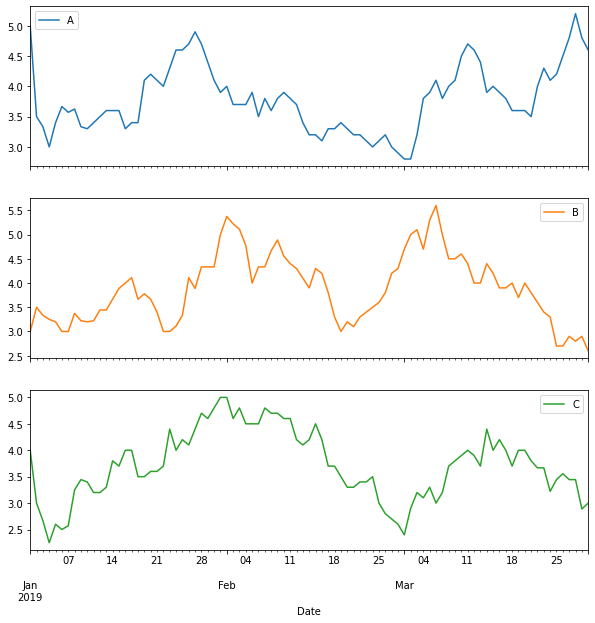

In [14]:
(pd.pivot_table(
    df, 
    values='Invoice ID', 
    aggfunc='count', 
    columns='Branch', 
    index='Date')
        .rolling(
            window=10, 
            min_periods=1)
        .mean()
            .plot(figsize=(10, 10), subplots=True)
)

In [15]:
dat = (pd.pivot_table(
    df, 
    values='Invoice ID', 
    aggfunc='count', 
    columns='Branch', 
    index='Date')
        .rolling(
            window=10, 
            min_periods=1)
        .mean())

Text(0.5, 1.0, 'Branch C')

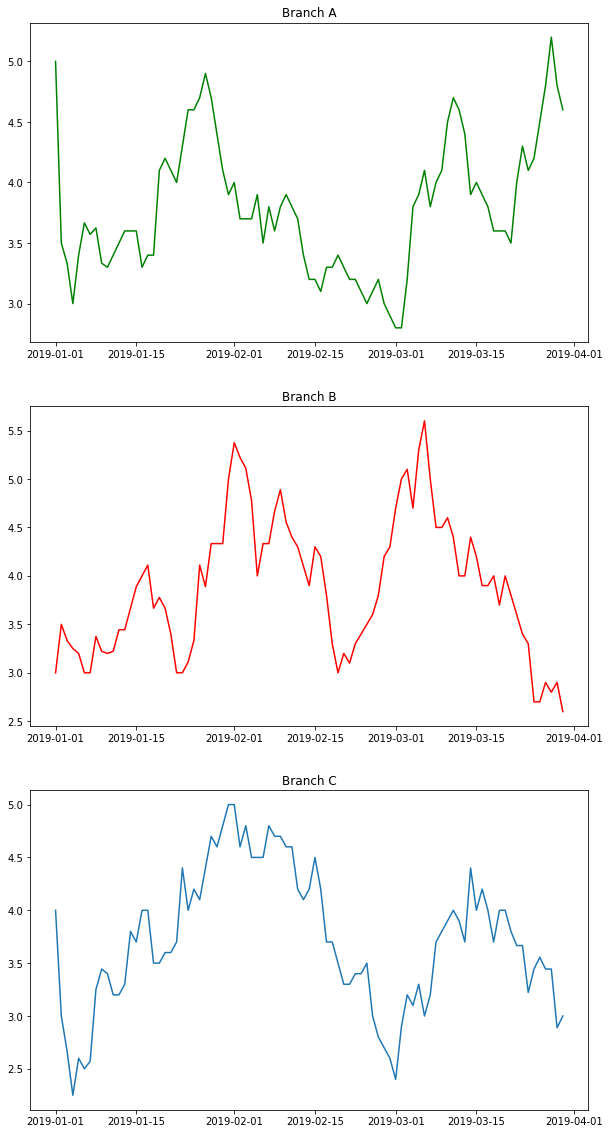

In [16]:
fig, axs = plt.subplots(3, figsize=(10, 20))
# fig.subplots_adjust(hspace=1.1)
axs[0].plot(dat.index, dat.A, color='g')
axs[0].set_title(f'Branch {dat.columns[0]}')
axs[1].plot(dat.index, dat.B, color='r')
axs[1].set_title(f'Branch {dat.columns[1]}')
axs[2].plot(dat.index, dat.C)
axs[2].set_title(f'Branch {dat.columns[2]}')


11. В каком городе расположена каждая из ветвей?

In [17]:
df[['Branch', 'City']].drop_duplicates()

,Branch,City
0,A,Yangon
1,C,Naypyitaw
9,B,Mandalay


12. В каком городе чаще всего пользуются для расчётов наличкой (`Cash`), а в каком - электронным кошельком (`Ewallet`)?  
Для выполнения этого задания сначала сформируйте таблицу, в которой строкам соответствуют способы оплаты (`Payment`), в столбцам - `City`, значения - количество покупок (они же - продажи).

Нас интересует процент покупок, сделанных каждым из способов. Потому после того, как таблица сформирвоана, нам надо разделить каждую колонку на сумму значений в ней. Это будет просто `DataFrame.sum()`.
В конце необходимо "разукрасить" таблицу, чтоб найти наибольшее и наименьшее значение по колонкам `Cash` и `Ewallet` соответственно.

In [18]:
purch = pd.pivot_table(
    df, 
    values='Invoice ID', 
    aggfunc='count', 
    columns='City', 
    index='Payment')
purch = purch / purch.sum()
purch.style.background_gradient()


City,Mandalay,Naypyitaw,Yangon
Payment,,,
Cash,0.331325,0.378049,0.323529
Credit card,0.328313,0.298780,0.305882
Ewallet,0.340361,0.323171,0.370588


In [110]:
purch.style.highlight_quantile(q_left=0.5, q_right=0.5)

City,Mandalay,Naypyitaw,Yangon
Payment,,,
Cash,0.331325,0.378049,0.323529
Credit card,0.328313,0.298780,0.305882
Ewallet,0.340361,0.323171,0.370588


13. Посмотрим на распределение цен на товары. Выведите распределение цен в каждой из товарных групп на графике. В какой группе товаров больше всего дорогих тововаров (от 90 до 100 у.е.)?

В ходе выполнения задания необходимо построить гистограмму распределения цен на товары в каждой группе. Возможно, будет удобно вывести все гистограммы на однйо фигуре, но можно и на разных.

In [43]:
hist_data = pd.pivot_table(
    df, 
    values='Unit price', 
    aggfunc='sum', 
    columns='Product line',
    index='Invoice ID')


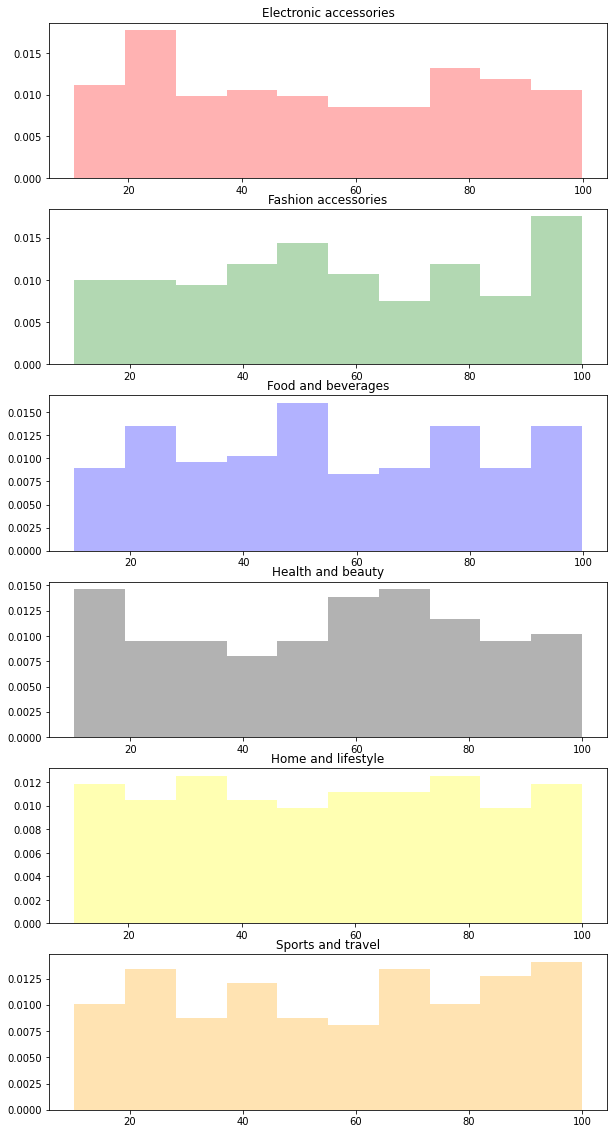

In [79]:
fig, axs = plt.subplots(6, figsize=(10, 20)) # nrows=3, ncols=2
colr = ['red', 'green', 'blue', 'black', 'yellow', 'orange']
kwargs = dict(histtype='barstacked', alpha=0.3, density=True, bins=10)
for i, k in enumerate(hist_data.columns):
    axs[i].hist(hist_data.loc[:,k], **kwargs, color=colr[i])
    axs[i].set_title(k)


14. Есть ли зависимость между ценой и рейтингом товаров группы "Health and beauty" ? Чтобы выяснить - отобразите график рассеянья и выведите коэффициент корреляции.

Если не видим линейных зависимостей на граифке рассеянья, значит зависимости нет.  
Если коэффициент корреляции меньше 0.2 - значит зависимости нет.

In [89]:
d = df[df['Product line']=='Health and beauty'][['Unit price','Rating']]

In [94]:
d.corr()

,Unit price,Rating
Unit price,1.000000,0.051836
Rating,0.051836,1.000000


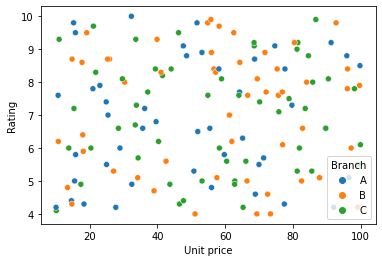

In [96]:
sns.scatterplot(
    data=df[df['Product line']=='Health and beauty'],
    x='Unit price', y='Rating', hue='Branch'
);

15*. Опциональное, но желательное задание.   
Постройте все графики, фигурирующие в заданиях, с помощью seaborn.

In [46]:
# ваш код тут

In [77]:
hist_data[hist_data > 90]

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Invoice ID,,,,,,
101-17-6199,NaN,NaN,NaN,NaN,NaN,NaN
101-81-4070,NaN,NaN,NaN,NaN,NaN,NaN
102-06-2002,NaN,NaN,NaN,NaN,NaN,NaN
102-77-2261,NaN,NaN,NaN,NaN,NaN,NaN
105-10-6182,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
894-41-5205,NaN,NaN,NaN,NaN,NaN,NaN
895-03-6665,NaN,NaN,NaN,NaN,NaN,NaN
895-66-0685,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df.style.bar(subset=['Unit price', 'Rating'], align='mid', color=['#d65f5f', '#5fba7d'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,2019-01-05 00:00:00,13:08,Ewallet,522.830000,4.761905,26.141500,9.100000
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,2019-03-08 00:00:00,10:29,Cash,76.400000,4.761905,3.820000,9.600000
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.330000,7,16.215500,340.525500,2019-03-03 00:00:00,13:23,Credit card,324.310000,4.761905,16.215500,7.400000
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.220000,8,23.288000,489.048000,2019-01-27 00:00:00,20:33,Ewallet,465.760000,4.761905,23.288000,8.400000
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.310000,7,30.208500,634.378500,2019-02-08 00:00:00,10:37,Ewallet,604.170000,4.761905,30.208500,5.300000
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.390000,7,29.886500,627.616500,2019-03-25 00:00:00,18:30,Ewallet,597.730000,4.761905,29.886500,4.100000
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.840000,6,20.652000,433.692000,2019-02-25 00:00:00,14:36,Ewallet,413.040000,4.761905,20.652000,5.800000
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.560000,10,36.780000,772.380000,2019-02-24 00:00:00,11:38,Ewallet,735.600000,4.761905,36.780000,8.000000
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.260000,2,3.626000,76.146000,2019-01-10 00:00:00,17:15,Credit card,72.520000,4.761905,3.626000,7.200000
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.840000,3,8.226000,172.746000,2019-02-20 00:00:00,13:27,Credit card,164.520000,4.761905,8.226000,5.900000
